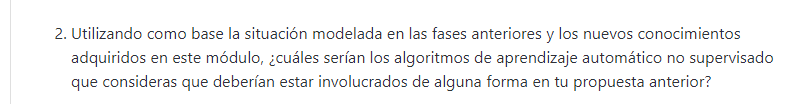

El mas adecuado que veo seria el kmens por su usibilidad para agrupar

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("DataFrame.csv")

In [21]:
df.head(5)

,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
0,1,100,79,81,3,2,2,0
1,3,83,100,86,4,1,1,0
2,3,57,64,70,3,2,1,0
3,2,28,6,21,2,1,2,1
4,2,81,92,52,3,2,1,0


In [22]:
df.shape

(10000, 8)

In [23]:
df["Protocolo"].value_counts()

1    5005
0    4995
Name: Protocolo, dtype: int64

In [24]:
df.describe()

,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.010000,51.432600,51.267600,51.14230,2.504400,1.501400,1.500700,0.500500
std,0.818393,27.716668,27.572106,27.44587,1.115753,0.500023,0.500025,0.500025
min,1.000000,5.000000,5.000000,5.00000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,28.000000,28.000000,28.00000,2.000000,1.000000,1.000000,0.000000
50%,2.000000,50.000000,50.000000,50.00000,3.000000,2.000000,2.000000,1.000000
75%,3.000000,76.000000,75.000000,75.00000,4.000000,2.000000,2.000000,1.000000
max,3.000000,100.000000,100.000000,100.00000,4.000000,2.000000,2.000000,1.000000


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
groups = df.groupby(df.Tipo_embalaje)

In [28]:
groups.describe()

Ancho                                                      \
                count       mean        std  min   25%   50%   75%    max   
Tipo_embalaje                                                               
1              3299.0  50.849348  27.617845  5.0  27.0  49.0  74.0  100.0   
2              3302.0  51.535130  27.698081  5.0  28.0  50.0  76.0  100.0   
3              3399.0  51.899088  27.828325  5.0  28.0  50.0  77.0  100.0   

                Largo             ... Temperatura      Protocolo            \
                count       mean  ...         75%  max     count      mean   
Tipo_embalaje                     ...                                        
1              3299.0  50.707487  ...         2.0  2.0    3299.0  0.511973   
2              3302.0  51.864022  ...         2.0  2.0    3302.0  0.490309   
3              3399.0  51.231833  ...         2.0  2.0    3399.0  0.499264   

                                                  
                    std  min  25%  50%  75%  max  
Tipo_embalaje                                     
1              0.499932  0.0  0.0  1.0  1.0  1.0  
2              0.499982  0.0  0.0  0.0  1.0  1.0  
3              0.500073  0.0  0.0  0.0  1.0  1.0  

[3 rows x 56 columns]

In [29]:
embalajeA = groups.get_group(1)
embalajeB =groups.get_group(2)
embalajeC =groups.get_group(3)

In [33]:
print(embalajeA.shape)
embalajeA.head(3)

(3299, 8)


,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
0,1,100,79,81,3,2,2,0
5,1,20,42,28,1,2,1,1
9,1,51,56,63,3,2,1,0


In [34]:
print(embalajeB.shape)
embalajeB.head(3)

(3302, 8)


,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
3,2,28,6,21,2,1,2,1
4,2,81,92,52,3,2,1,0
6,2,21,12,47,3,1,2,1


In [35]:
print(embalajeC.shape)
embalajeC.head(3)

(3399, 8)


,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
1,3,83,100,86,4,1,1,0
2,3,57,64,70,3,2,1,0
7,3,87,72,51,3,1,1,0


#GRUPO A

In [43]:
groupsA = embalajeA.groupby(df.Protocolo)

In [44]:
groupsA.head()

,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
0,1,100,79,81,3,2,2,0
5,1,20,42,28,1,2,1,1
9,1,51,56,63,3,2,1,0
15,1,89,95,72,1,1,1,0
27,1,73,99,84,1,2,1,0
31,1,82,83,57,3,1,2,0
40,1,15,9,47,1,2,1,1
46,1,34,23,47,4,1,1,1
53,1,28,34,23,1,1,2,1
60,1,11,48,33,4,2,2,1


In [48]:
protocolo1_embalajeA = groupsA.get_group(0)
protocolo2_embalajeA = groupsA.get_group(1)

In [57]:
protocolo1_embalajeA.head()

,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura,Protocolo
0,1,100,79,81,3,2,2,0
9,1,51,56,63,3,2,1,0
15,1,89,95,72,1,1,1,0
27,1,73,99,84,1,2,1,0
31,1,82,83,57,3,1,2,0


#GRUPO B

In [49]:
groupsB = embalajeB.groupby(df.Protocolo)

In [50]:
protocolo1_embalajeB = groupsB.get_group(0)
protocolo2_embalajeB = groupsB.get_group(1)

# GRUPO C

In [51]:
groupsC = embalajeC.groupby(df.Protocolo)

In [52]:
protocolo1_embalajeC = groupsC.get_group(0)
protocolo2_embalajeC = groupsC.get_group(1)

#Clouster

In [55]:
from sklearn.cluster import KMeans

In [56]:
modelo = KMeans(n_clusters=4)

In [59]:
p1A = protocolo1_embalajeA.drop('Protocolo',axis=1)

In [60]:
p1A.head(2)

,Tipo_embalaje,Ancho,Largo,Alto,Procedencia,Manipulacion,Temperatura
0,1,100,79,81,3,2,2
9,1,51,56,63,3,2,1


In [61]:
modelo.fit(p1A.to_numpy())

KMeans(n_clusters=4)

In [62]:
modelo.labels_

array([0, 3, 1, ..., 2, 3, 3], dtype=int32)

#PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
modeloPCA = PCA(n_components=2)
PCA_projection = modeloPCA.fit(p1A).transform(p1A)

#Display

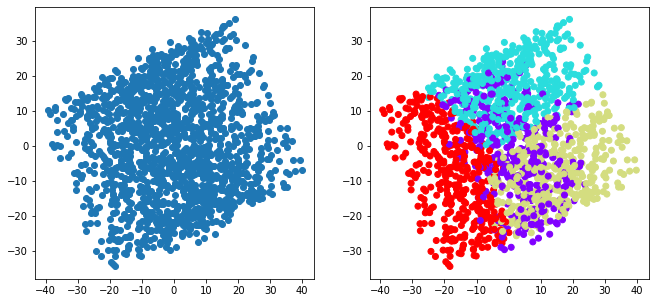

In [69]:
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(PCA_projection[:,0], PCA_projection[:,1])
axes[1].scatter(PCA_projection[:,0], PCA_projection[:,1], c = modelo.labels_, cmap='rainbow')
# axes[1].scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker="+", s=500, c='orange')
plt.show()